In [1]:
from scipy.stats import norm, uniform
from scipy.integrate import simps
import numpy as np
import matplotlib.pyplot as plt

(array([  8.,  34.,  93., 177., 243., 213., 136.,  72.,  18.,   6.]),
 array([-9.27249283, -6.89021891, -4.50794499, -2.12567107,  0.25660285,
         2.63887677,  5.02115069,  7.40342461,  9.78569853, 12.16797245,
        14.55024637]),
 <BarContainer object of 10 artists>)

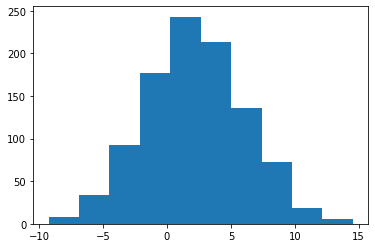

In [2]:
plt.hist(norm.rvs(loc=2, scale=4, size=1000))

[13. 16. 11. ... 16. 12. 20.]
(array([ 1868.,  2874., 11547.,  9565., 24238., 12621., 21171.,  6907.,
        7385.,  1824.]), array([ 6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. , 19.5, 21. ]), <BarContainer object of 10 artists>)


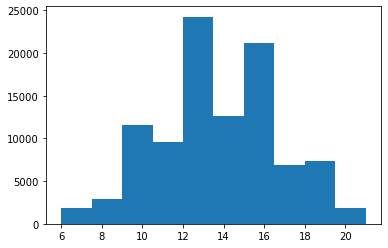

In [3]:
sample = np.ceil(uniform.rvs(loc=1, scale=6, size=(100000,3))).sum(axis=1)
print(sample)
print(plt.hist(sample))

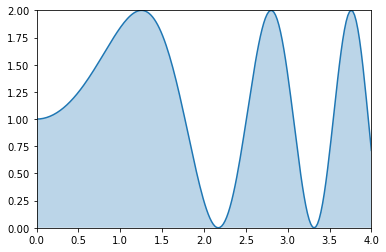

In [4]:
#Rejection Smapling

def pdf(x):
    return np.sin(x ** 2) + 1

xs = np.linspace(0, 4, 200)
ps = pdf(xs)
plt.plot(xs, ps)
plt.fill_between(xs, 0, ps, alpha=0.3)
plt.xlim(0, 4)
plt.ylim(0, 2);

(0.0, 2.0)

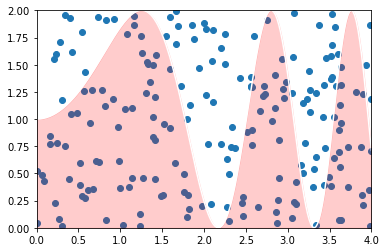

In [5]:
n = 200
random_x = uniform.rvs(loc=0, scale=4, size=n)
random_y = uniform.rvs(loc=0, scale=2, size=n)

plt.scatter(random_x, random_y)
plt.plot(xs, ps, c="w")
plt.fill_between(xs, 0, ps, color="r", alpha=0.2)
plt.xlim(0,4)
plt.ylim(0,2)

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

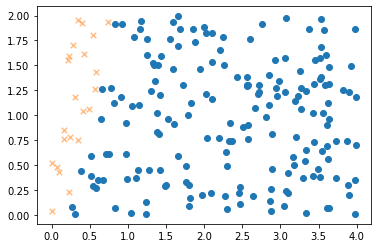

In [22]:
passed = random_y <= pdf(random_x)
plt.scatter(random_x[passed], random_y[passed])
plt.scatter(random_x[~passed], random_y[~passed], marker="x", s=30, alpha=0.5)
plt.plot(xs, ps, c="w")
plt.fill_betweeen(xs, 0, ps, color="w", alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2);


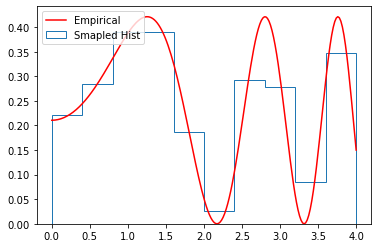

In [12]:
n2 = 100000
x_test = uniform.rvs(scale=4, size=n2)
x_final = x_test[uniform.rvs(scale=2, size=n2) <= pdf(x_test)]

from scipy.integrate import simps
plt.hist(x_final, density=True, histtype="step", label="Smapled Hist")
plt.plot(xs, ps / simps(ps, x=xs), c="r", label="Empirical")
plt.legend(loc=2);


In [36]:
#Inversion Sampling

def pdf(x):
    return 3 * x ** 2
def cdf(x):
    return x**3
def icdf(x):
    return x**(1/3)


((0.0, 1.0), (0.0, 1.0))

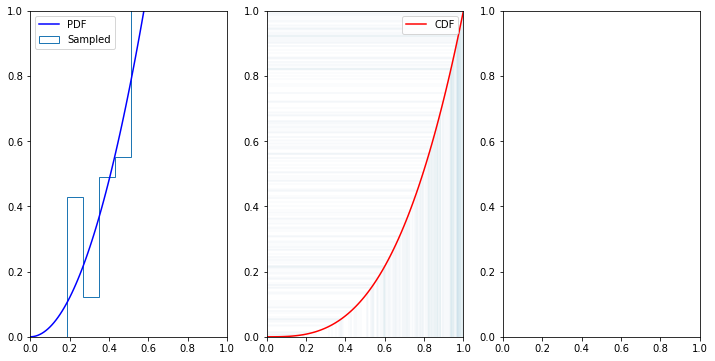

In [42]:
xs = np.linspace(0, 1, 100)
pdfs = pdf(xs)
cdfs = cdf(xs)
n3 = 200
u_samps = uniform.rvs(size=n3)
x_samps = icdf(u_samps)


fig, axes = plt.subplots(ncols=3, figsize=(12,6))

axes[0].plot(xs, pdfs, color="b", label="PDF")
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled")
axes[1].plot(xs, cdfs, color="r", label="CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend()
axes[1].legend()
axes[1].set_xlim(0,1), axes[1].set_ylim(0,1)
axes[0].set_xlim(0,1), axes[0].set_ylim(0,1)

((0.0, 1.0), (0.0, 1.0))

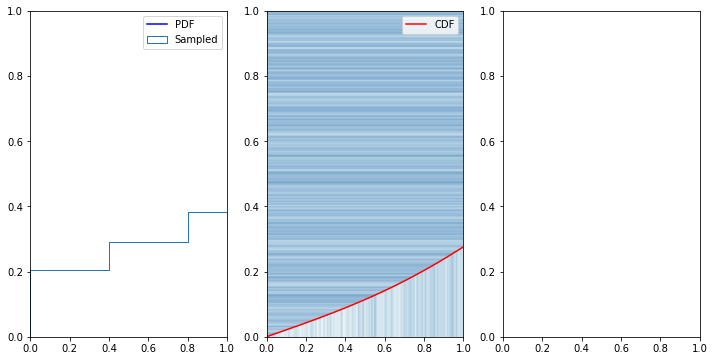

In [43]:
from scipy.interpolate import interp1d

def pdf(x):
    return np.sin(x**2) + 1
xs = np.linspace(0, 4, 10000)
pdfs = pdf(xs)
cdfs = pdfs.cumsum() / pdfs.sum()

u_samps = uniform.rvs(size=5000)
x_samps = interp1d(cdfs, xs)(u_samps)

fig, axes = plt.subplots(ncols=3, figsize=(12,6))

axes[0].plot(xs, pdfs, color="b", label="PDF")
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled")
axes[1].plot(xs, cdfs, color="r", label="CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend()
axes[1].legend()
axes[1].set_xlim(0,1), axes[1].set_ylim(0,1)
axes[0].set_xlim(0,1), axes[0].set_ylim(0,1)